# Ejercicio de Regresión 1 (Core)


Objetivo

 Aplicar los conceptos de regresión lineal para resolver un problema práctico utilizando Python.

Descripción del problema:

Supongamos que trabajas en una empresa que desea **predecir el precio de venta de casas en función de varias características**. Tienes un conjunto de datos con información sobre las casas, incluyendo el tamaño de la casa (en pies cuadrados), el número de habitaciones, el número de baños y la antigüedad de la casa (en años). Tu tarea es **construir un modelo de regresión lineal que pueda predecir el precio de venta de una casa dada**.



# 1) Carga de datos:
Descarga el archivo de datos house_prices.csv que contiene las siguientes columnas:

SqFt: Tamaño de la casa en pies cuadrados.

Bedrooms: Número de habitaciones.

Bathrooms: Número de baños.

price: Precio de venta de la casa.

el archivo se encuentra en el siguiente link

https://github.com/ywchiu/riii/blob/master/data/house-prices.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/1_Core house-prices.csv')

In [3]:
df

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


# 2) Exploración de datos:
Realiza un análisis exploratorio de los datos para entender su estructura y detectar posibles problemas como valores nulos o outliers.


In [4]:
df.shape

(128, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [6]:
df.describe().round(2)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.00,128.00,128.00,128.00,128.00,128.00
mean,64.50,130427.34,2000.94,3.02,2.45,2.58
std,37.09,26868.77,211.57,0.73,0.51,1.07
min,1.00,69100.00,1450.00,2.00,2.00,1.00
25%,32.75,111325.00,1880.00,3.00,2.00,2.00
50%,64.50,125950.00,2000.00,3.00,2.00,3.00
75%,96.25,148250.00,2140.00,3.00,3.00,3.00
max,128.00,211200.00,2590.00,5.00,4.00,6.00


In [7]:
df.groupby('Brick').count()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Neighborhood
Brick,,,,,,,
No,86,86,86,86,86,86,86
Yes,42,42,42,42,42,42,42


In [8]:
df.groupby('Neighborhood').count()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick
Neighborhood,,,,,,,
East,45,45,45,45,45,45,45
North,44,44,44,44,44,44,44
West,39,39,39,39,39,39,39


In [9]:
df.isnull().sum()

,0
Home,0
Price,0
SqFt,0
Bedrooms,0
Bathrooms,0
Offers,0
Brick,0
Neighborhood,0


In [10]:
df.duplicated().sum()

0

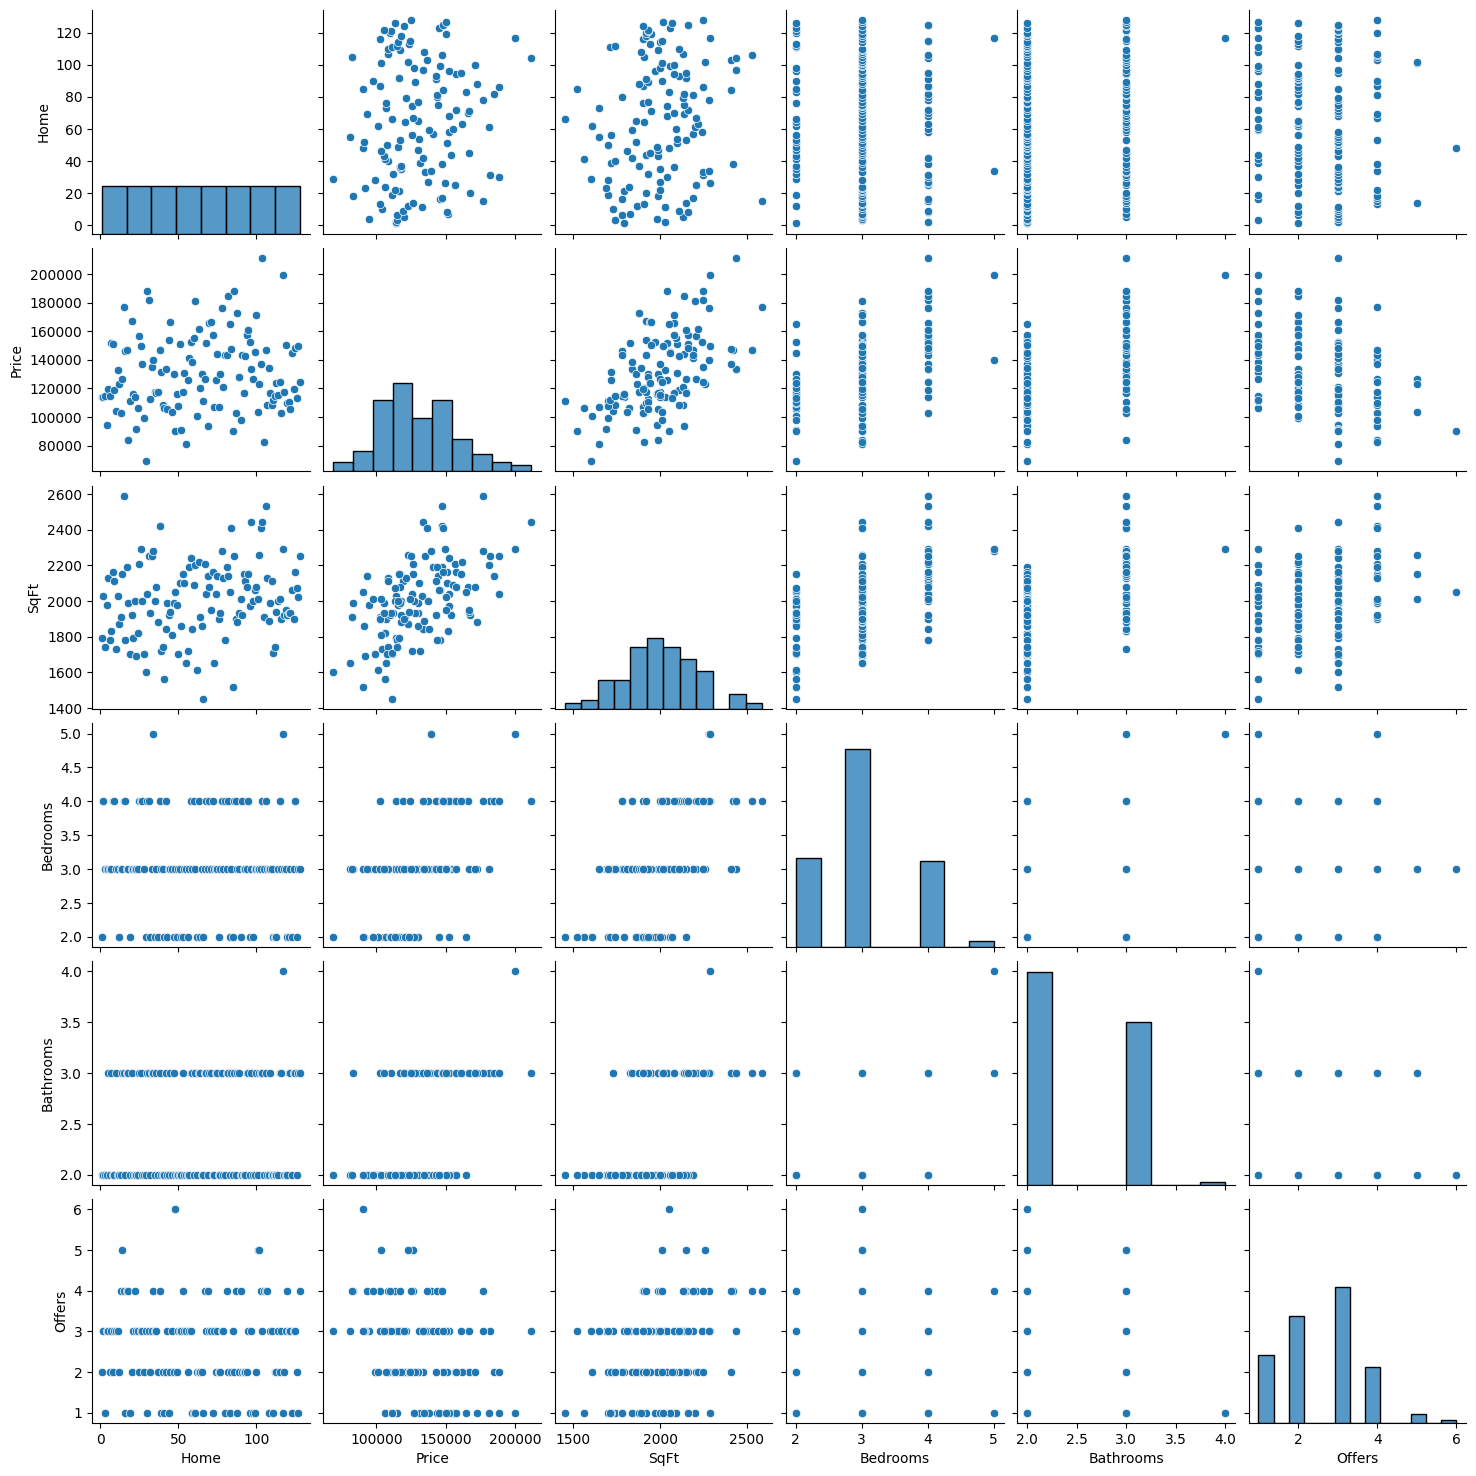

In [11]:
sns.pairplot(data=df)

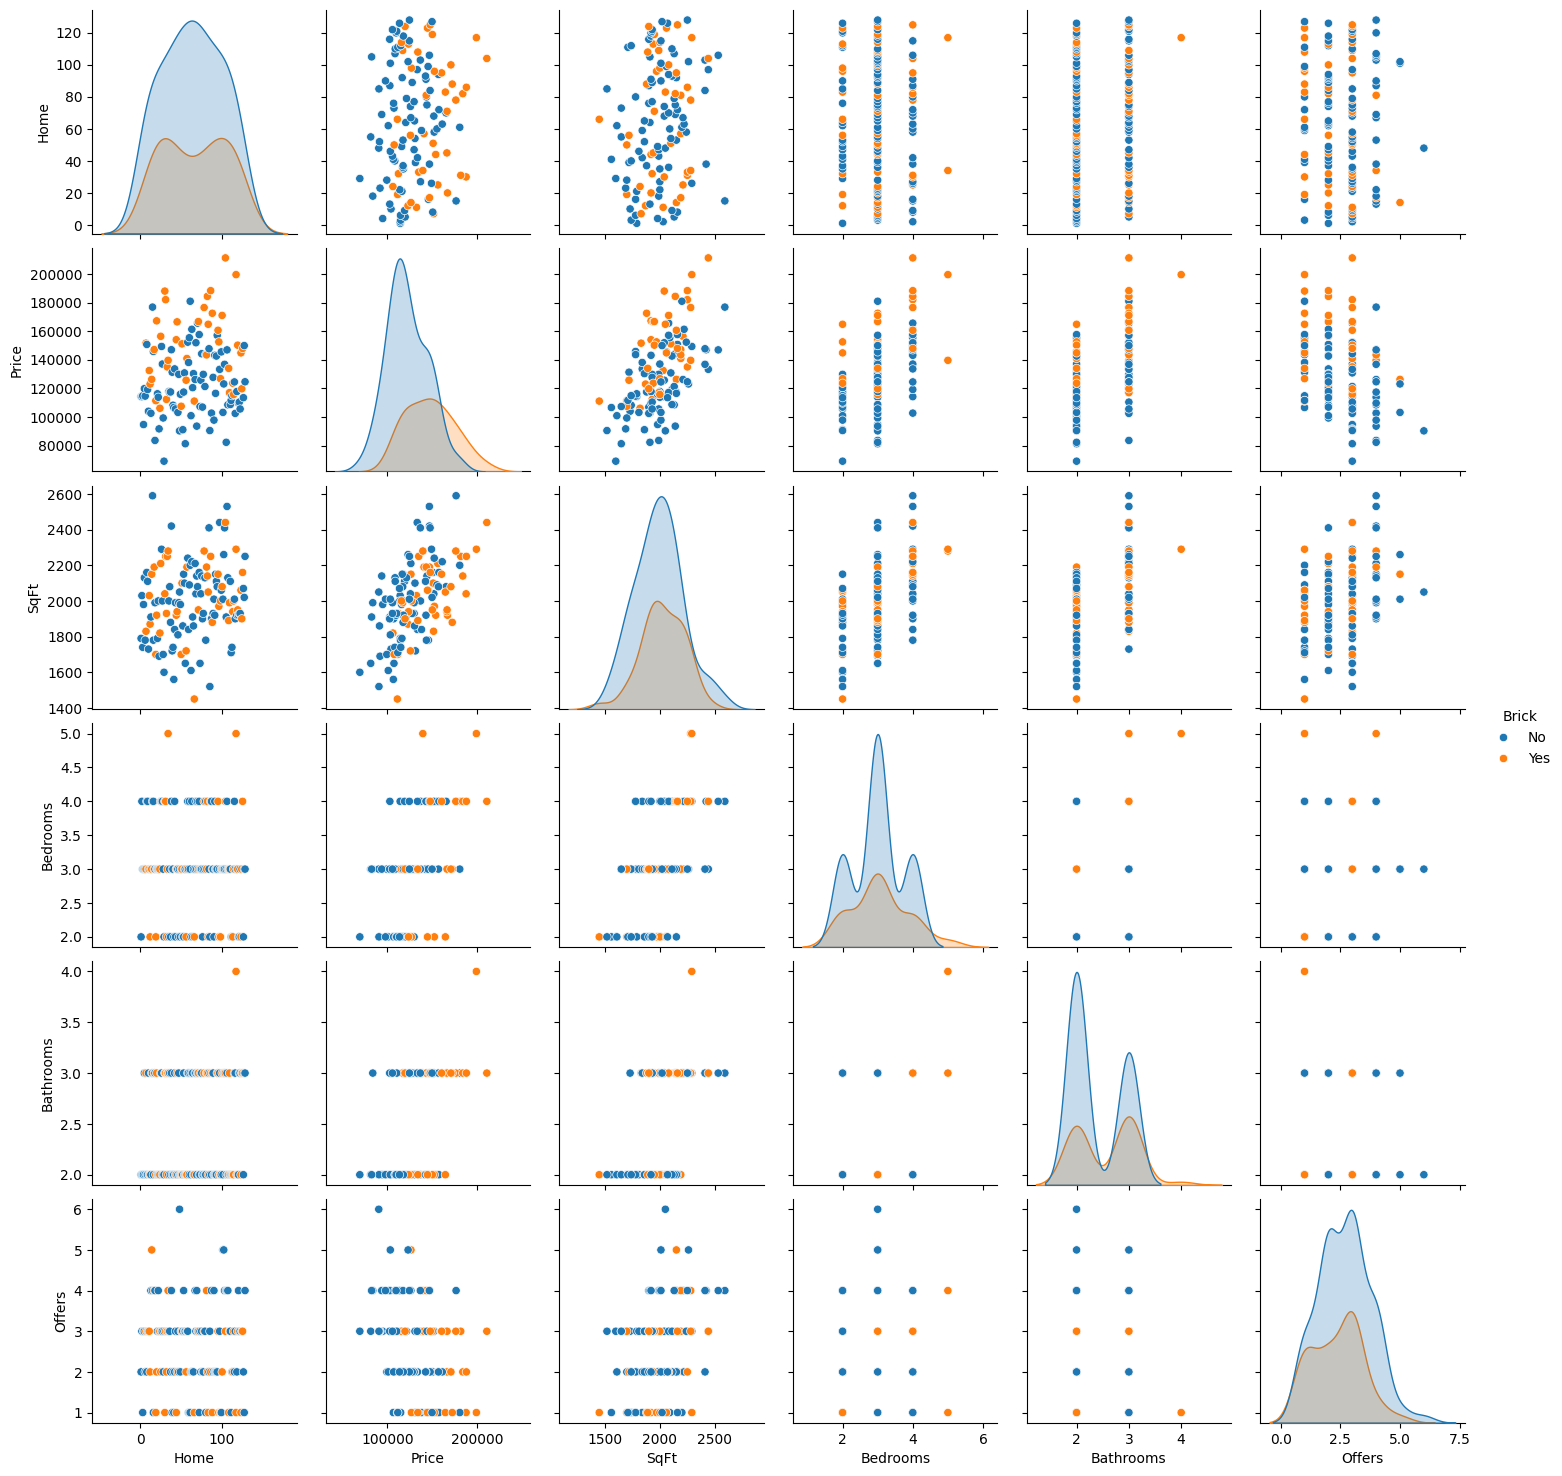

In [12]:
sns.pairplot(data=df, hue='Brick')

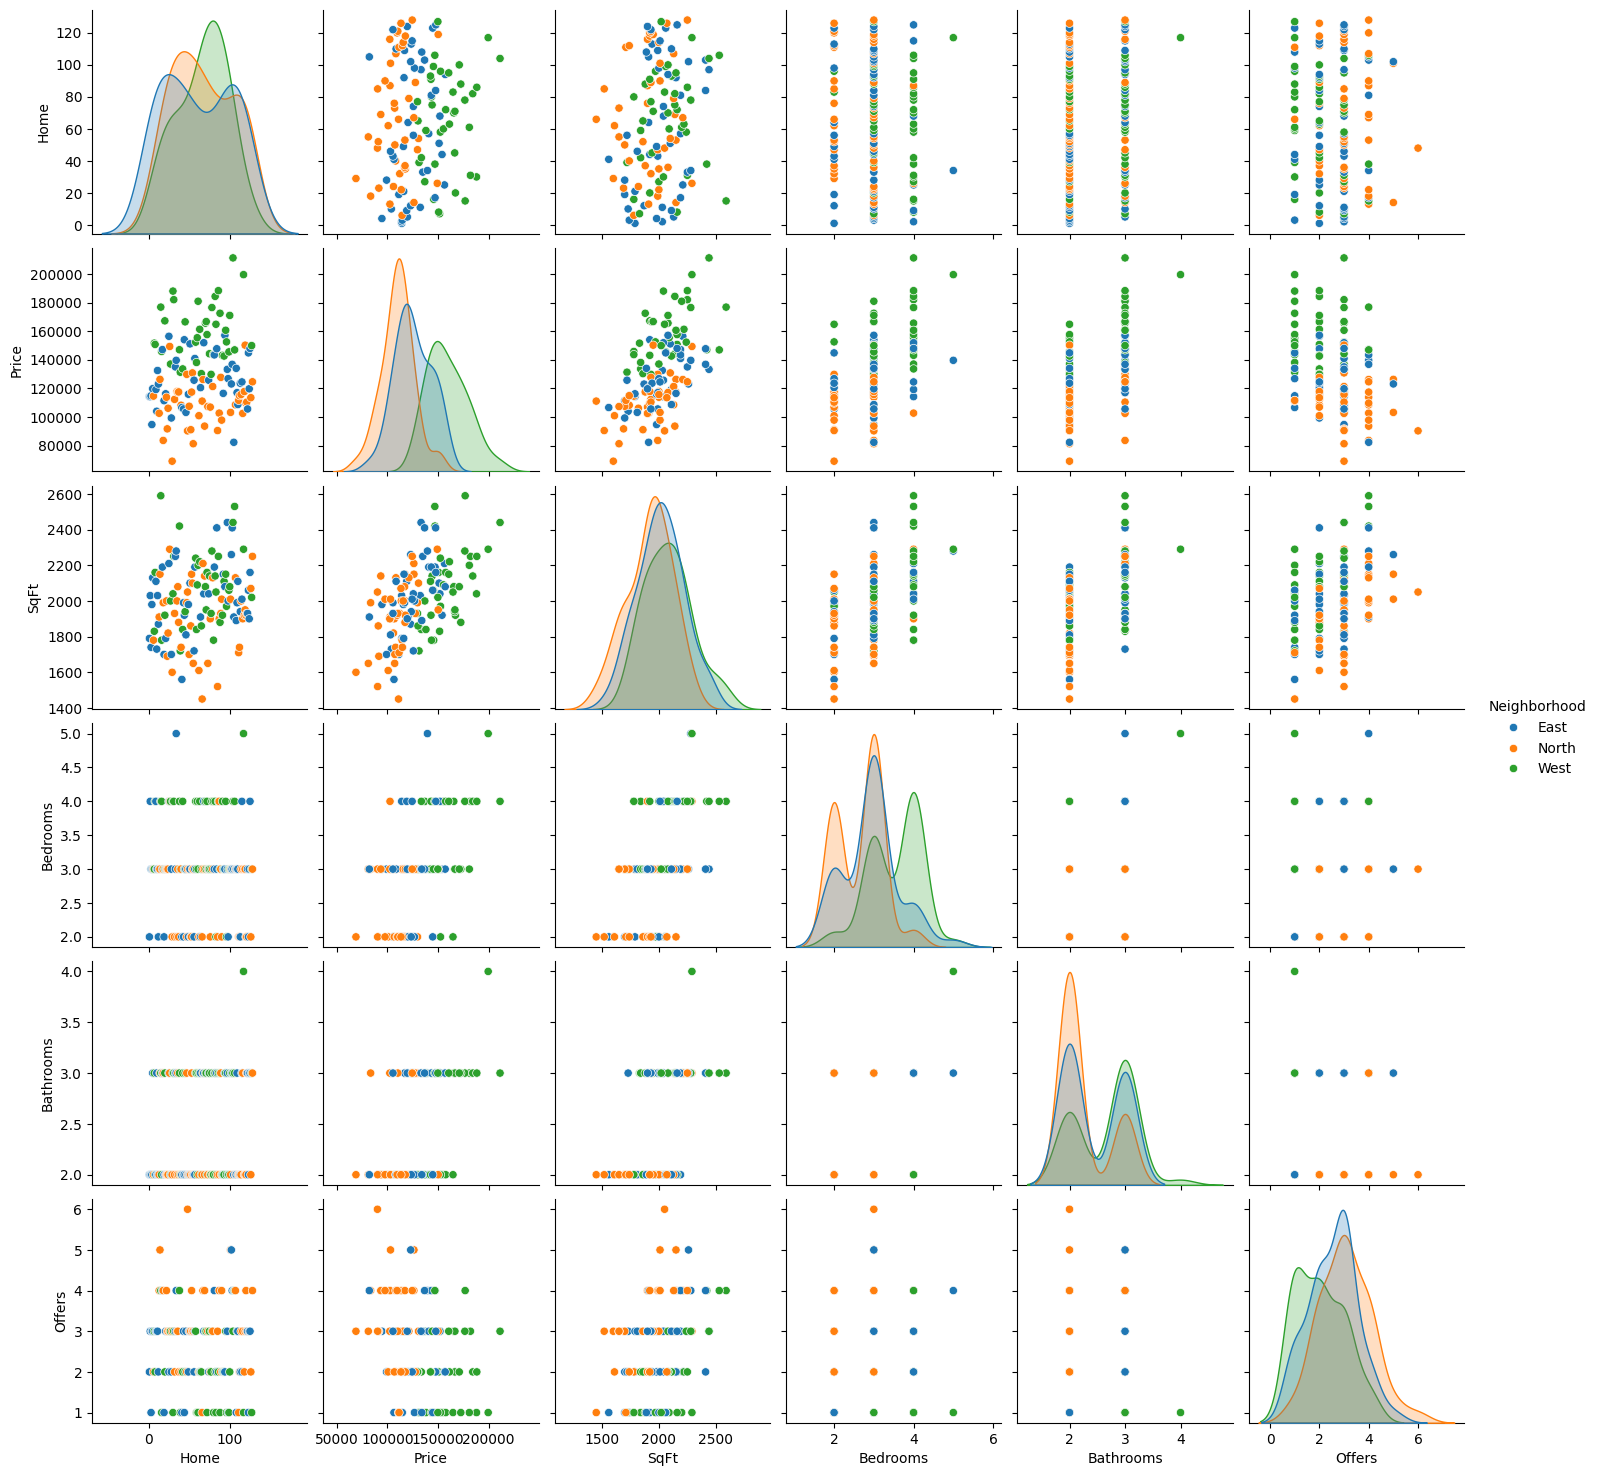

In [13]:
sns.pairplot(data=df, hue='Neighborhood')

In [14]:
df['Price'].value_counts(ascending=False)

,count
Price,
117800,2
125700,2
105600,2
103200,2
129800,2
...,...
117500,1
117100,1
139600,1


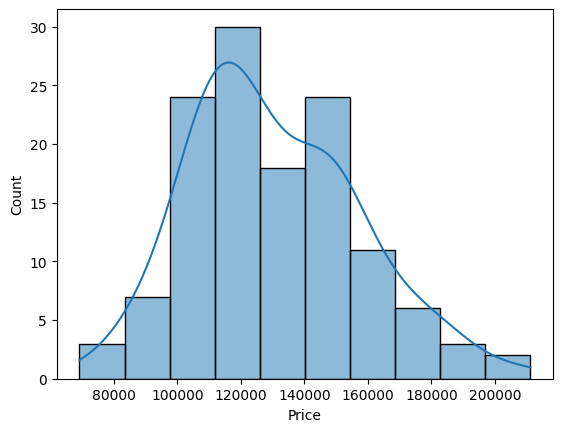

In [15]:
sns.histplot(df['Price'], kde=True)
plt.show()

In [16]:
df['Brick'] = df['Brick'].map({'Yes': 1, 'No': 0})

In [17]:
df['Neighborhood'] = df['Neighborhood'].map({'East': 1, 'North': 2, 'West': 3})

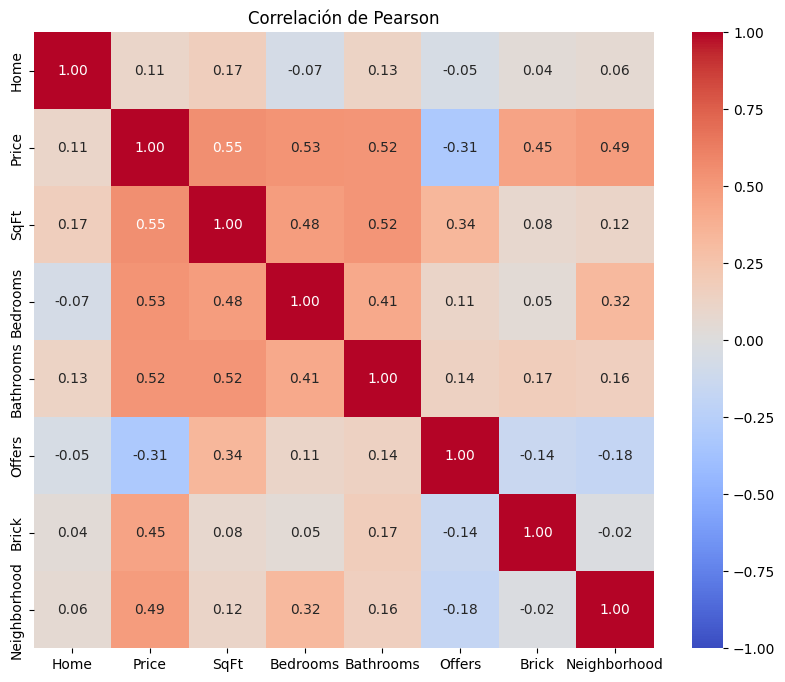

In [18]:
correlation_matrix_spearman = df.corr(method='pearson')

plt.figure(figsize=(10, 8))
plt.title('Correlación de Pearson')
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.show()

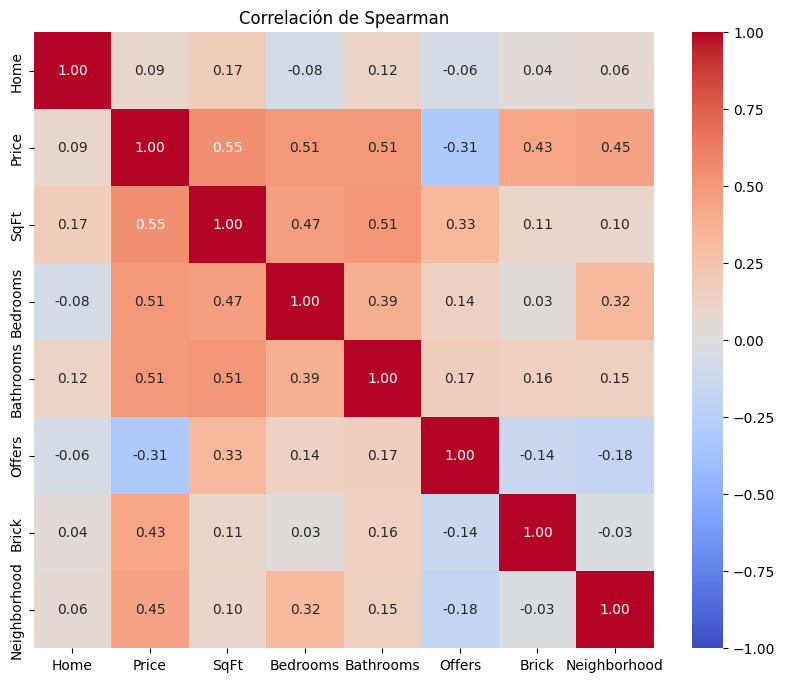

In [19]:
correlation_matrix_spearman = df.corr(method='spearman')

plt.figure(figsize=(10, 8))
plt.title('Correlación de Spearman')
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.show()

## Análisis
-	Se cargaron los datos correctamente y se realizaron algunas revisiones puntuales iniciales y otras a profundidad
-	.info(): Hay 128 entradas, así que es un dataset pequeño, con 8 columnas, 6 de estas numéricas y 2 de texto
-	.describe(): Price y SqFt tienen valores continuos, mientras que Bedrooms, Bathrooms y Offers parecen ser valores discretos, además parece haber outliers
-	.isnull(): No hay valores nulos
-	.duplicated(): No hay valores duplicados
-	Al graficar las variables con sns.pairplot(): Se observan diferentes visualizaciones donde se confirma lo que se describió previamente, pero también se puede observar que Price y SqFt parecen distribuirse de manera normal, y que si hay un outlier a considerar, ya que parece ser el único que parece tener 5 habitaciones con 4 baños
-	Se codificó las variables categóricas y se procedió a revisar una matriz de correlación para observar posibles corrrelaciones del precio con otras columnas o variables y así tener más claro que características pueden ir en el modelo.
-	Según Claude: Sobre las matrices de correlación:
    -	Pearson: Mide correlaciones lineales entre variables continuas. Asume que los datos siguen una distribución normal y es sensible a outliers. Es la más común para regresión lineal.
    -	Spearman: Mide correlaciones monótonas (que van en una dirección, sea lineal o no). Es no paramétrica y más robusta a outliers ya que usa rangos en lugar de valores exactos.
    -	Kendall: Similar a Spearman pero más robusta para muestras pequeñas y datos con valores atados (repetidos). También es no paramétrica.
-	Si bien se corrieron los tres métodos, se decidió trabajar con Spearman, para la mayoría de las variables por lo de ser más robusta a outliers y no parámétrica, pero Pearson para Price y SqFt ya que parecen tener distribución normal (aunque hay outliers). De esto se puede resumir que, conforme a la variable Price, variables como SqFt, Bedrooms, Bathrooms tienen mayor importancia, seguido de Neighborhood y Brick, mientras que Offers pareciera no dar ningún tipo de información a la variable Price.


# 3) Preparación de datos:
Divide los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).


In [20]:
X = df[['SqFt', 'Bedrooms', 'Bathrooms']]
y = df['Price']

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

MMscaler = StandardScaler()
X_MMscaled = MMscaler.fit_transform(X)

Normalizer = Normalizer()
X_Normalizer = Normalizer.fit_transform(X)

robust_scaler = RobustScaler()
X_robust = robust_scaler.fit_transform(X)

In [28]:
print("\nDataFrame original:\n")
print(X)

print("\nDataFrame escalado con StandardScaler:\n")
print(X_scaled)

print("\nDataFrame escalado con MinMaxScaler:\n")
print(X_MMscaled)

print("\nDataFrame Normalización con Normalizer:\n")
print(X_Normalizer)

print("\nDataFrame escalado con RobustScaler:\n")
print(X_robust)


DataFrame original:

     SqFt  Bedrooms  Bathrooms
0    1790         2          2
1    2030         4          2
2    1740         3          2
3    1980         3          2
4    2130         3          3
..    ...       ...        ...
123  1900         3          3
124  2160         4          3
125  2070         2          2
126  2020         3          3
127  2250         3          3

[128 rows x 3 columns]

DataFrame escalado con StandardScaler:

[[-1.00091648 -1.41532739 -0.86893879]
 [ 0.13790405  1.35050324 -0.86893879]
 [-1.23817076 -0.03241208 -0.86893879]
 [-0.09935023 -0.03241208 -0.86893879]
 [ 0.6124126  -0.03241208  1.08236235]
 [-1.04836734 -0.03241208 -0.86893879]
 [-0.81111306 -0.03241208  1.08236235]
 [ 0.75476517  1.35050324 -0.86893879]
 [ 0.51751089  1.35050324 -0.86893879]
 [-1.28562162 -0.03241208  1.08236235]
 [ 0.13790405 -0.03241208 -0.86893879]
 [-0.62130964 -1.41532739 -0.86893879]
 [-0.43150622 -0.03241208 -0.86893879]
 [ 0.70731432 -0.03241208  1.08236

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train_MMscaled, X_test_MMscaled, y_train, y_test = train_test_split(X_MMscaled, y, test_size=0.2, random_state=42)

X_train_Normalizer, X_test_Normalizer, y_train, y_test = train_test_split(X_Normalizer, y, test_size=0.2, random_state=42)

X_train_robust, X_test_robust, y_train, y_test = train_test_split(X_robust, y, test_size=0.2, random_state=42)

#4) Entrenamiento del modelo:
Entrena un modelo de regresión lineal utilizando los datos de entrenamiento.


In [31]:
from sklearn.linear_model import LinearRegression

lm1 = LinearRegression()
lm1.fit(X_train, y_train)

lm2 = LinearRegression()
lm2.fit(X_train_scaled, y_train)

lm3 = LinearRegression()
lm3.fit(X_train_MMscaled, y_train)

lm4 = LinearRegression()
lm4.fit(X_train_Normalizer, y_train)

lm5 = LinearRegression()
lm5.fit(X_train_robust, y_train)

LinearRegression()

In [32]:
print("\nCoeficientes del Modelo Lineal sin escalado:")
print(f"Intercepto: {lm1.intercept_}")
print(f"Coeficientes: {lm1.coef_}")

print("\nCoeficientes del Modelo Lineal StandardScaler:")
print(f"Intercepto: {lm2.intercept_}")
print(f"Coeficientes: {lm2.coef_}")

print("\nCoeficientes del Modelo Lineal MinMaxScaler:")
print(f"Intercepto: {lm3.intercept_}")
print(f"Coeficientes: {lm3.coef_}")

print("\nCoeficientes del Modelo Lineal Normalizer:")
print(f"Intercepto: {lm4.intercept_}")
print(f"Coeficientes: {lm4.coef_}")

print("\nCoeficientes del Modelo Lineal Robust:")
print(f"Intercepto: {lm5.intercept_}")
print(f"Coeficientes: {lm5.coef_}")


Coeficientes del Modelo Lineal sin escalado:
Intercepto: -16372.916362967444
Coeficientes: [   41.44755181 10278.00910207 13090.39118144]

Coeficientes del Modelo Lineal StandardScaler:
Intercepto: 129646.05967332424
Coeficientes: [8734.83761539 7432.13195417 6708.54485934]

Coeficientes del Modelo Lineal MinMaxScaler:
Intercepto: 129646.05967332424
Coeficientes: [8734.83761539 7432.13195417 6708.54485934]

Coeficientes del Modelo Lineal Normalizer:
Intercepto: 13940726522.506636
Coeficientes: [-1.39406320e+10 -1.28782257e+06  8.33610733e+06]

Coeficientes del Modelo Lineal Robust:
Intercepto: 123536.99693218438
Coeficientes: [10776.36347139 10278.00910207 13090.39118144]


#5) Evaluación del modelo:
Evalúa el modelo utilizando el conjunto de prueba. Calcula el error cuadrático medio (MSE) y el R-cuadrado (R²) del modelo.


In [33]:
y_pred1 = lm1.predict(X_test)
y_pred2 = lm2.predict(X_test_scaled)
y_pred3 = lm3.predict(X_test_MMscaled)
y_pred4 = lm4.predict(X_test_Normalizer)
y_pred5 = lm5.predict(X_test_robust)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

mse3 = mean_squared_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)

mse4 = mean_squared_error(y_test, y_pred4)
r2_4 = r2_score(y_test, y_pred4)

mse5 = mean_squared_error(y_test, y_pred5)
r2_5 = r2_score(y_test, y_pred5)

print("\nMétricas de evaluación (Modelo Lineal sin escalado):")
print(f"Error Cuadrático Medio (MSE): {mse1:.2f}")  # Muestra el MSE con dos decimales.
print(f"Coeficiente de Determinación (R²): {r2_1:.2f}")

print("\nMétricas de evaluación (Modelo Lineal StandardScaler):")
print(f"Error Cuadrático Medio (MSE): {mse2:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_2:.2f}")

print("\nMétricas de evaluación (Modelo Lineal MinMaxScaler):")
print(f"Error Cuadrático Medio (MSE): {mse3:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_3:.2f}")

print("\nMétricas de evaluación (Modelo Lineal Normalizer):")
print(f"Error Cuadrático Medio (MSE): {mse4:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_4:.2f}")

print("\nMétricas de evaluación (Modelo Lineal Robust):")
print(f"Error Cuadrático Medio (MSE): {mse5:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_5:.2f}")


Métricas de evaluación (Modelo Lineal sin escalado):
Error Cuadrático Medio (MSE): 320149938.23
Coeficiente de Determinación (R²): 0.46

Métricas de evaluación (Modelo Lineal StandardScaler):
Error Cuadrático Medio (MSE): 320149938.23
Coeficiente de Determinación (R²): 0.46

Métricas de evaluación (Modelo Lineal MinMaxScaler):
Error Cuadrático Medio (MSE): 320149938.23
Coeficiente de Determinación (R²): 0.46

Métricas de evaluación (Modelo Lineal Normalizer):
Error Cuadrático Medio (MSE): 447786555.95
Coeficiente de Determinación (R²): 0.24

Métricas de evaluación (Modelo Lineal Robust):
Error Cuadrático Medio (MSE): 320149938.23
Coeficiente de Determinación (R²): 0.46


##Análisis
Inicialmente se dio que el MSE es demasiado alto y el R2 poco explicativo, se deben realizar algunos otros ajustes para poder verificar...

Pero después de hacer varios escalados, no hay cambios mayores, por ello deje el código con todos los escalados y normalización, y después revisé dos modelos de regresión lineal más

In [38]:
from sklearn.linear_model import Ridge
ridge1 = Ridge(alpha=1.0)
ridge1.fit(X_train, y_train)

ridge2 = Ridge(alpha=1.0)
ridge2.fit(X_train_scaled, y_train)

ridge3 = Ridge(alpha=1.0)
ridge3.fit(X_train_MMscaled, y_train)

ridge4 = Ridge(alpha=1.0)
ridge4.fit(X_train_Normalizer, y_train)

ridge5 = Ridge(alpha=1.0)
ridge5.fit(X_train_robust, y_train)

Ridge()

In [39]:
from sklearn.linear_model import Lasso
lasso1 = Lasso(alpha=1.0)
lasso1.fit(X_train, y_train)

lasso2 = Lasso(alpha=1.0)
lasso2.fit(X_train_scaled, y_train)

lasso3 = Lasso(alpha=1.0)
lasso3.fit(X_train_MMscaled, y_train)

lasso4 = Lasso(alpha=1.0)
lasso4.fit(X_train_Normalizer, y_train)

lasso5 = Lasso(alpha=1.0)
lasso5.fit(X_train_robust, y_train)

Lasso()

In [40]:
print("Ridge")

print("\nCoeficientes del Modelo Lineal sin escalado:")
print(f"Intercepto: {ridge1.intercept_}")
print(f"Coeficientes: {ridge1.coef_}")

print("\nCoeficientes del Modelo Lineal StandardScaler:")
print(f"Intercepto: {ridge2.intercept_}")
print(f"Coeficientes: {ridge2.coef_}")

print("\nCoeficientes del Modelo Lineal MinMaxScaler:")
print(f"Intercepto: {ridge3.intercept_}")
print(f"Coeficientes: {ridge3.coef_}")

print("\nCoeficientes del Modelo Lineal Normalizer:")
print(f"Intercepto: {ridge4.intercept_}")
print(f"Coeficientes: {ridge4.coef_}")

print("\nCoeficientes del Modelo Lineal Robust:")
print(f"Intercepto: {ridge5.intercept_}")
print(f"Coeficientes: {ridge5.coef_}")

Ridge

Coeficientes del Modelo Lineal sin escalado:
Intercepto: -16405.740331442343
Coeficientes: [   42.39908264 10116.63805133 12532.45177306]

Coeficientes del Modelo Lineal StandardScaler:
Intercepto: 129651.30836580426
Coeficientes: [8672.55053412 7394.70357618 6687.59495793]

Coeficientes del Modelo Lineal MinMaxScaler:
Intercepto: 129651.30836580426
Coeficientes: [8672.55053412 7394.70357618 6687.59495793]

Coeficientes del Modelo Lineal Normalizer:
Intercepto: 130747.07247120203
Coeficientes: [ -0.59666178 252.88393759 160.04937688]

Coeficientes del Modelo Lineal Robust:
Intercepto: 123743.09868859872
Coeficientes: [10774.04409236 10199.34107168 12671.13785828]


In [41]:
print("Lasso")

print("\nCoeficientes del Modelo Lineal sin escalado:")
print(f"Intercepto: {lasso1.intercept_}")
print(f"Coeficientes: {lasso1.coef_}")

print("\nCoeficientes del Modelo Lineal StandardScaler:")
print(f"Intercepto: {lasso2.intercept_}")
print(f"Coeficientes: {lasso2.coef_}")

print("\nCoeficientes del Modelo Lineal MinMaxScaler:")
print(f"Intercepto: {lasso3.intercept_}")
print(f"Coeficientes: {lasso3.coef_}")

print("\nCoeficientes del Modelo Lineal Normalizer:")
print(f"Intercepto: {lasso4.intercept_}")
print(f"Coeficientes: {lasso4.coef_}")

print("\nCoeficientes del Modelo Lineal Robust:")
print(f"Intercepto: {lasso5.intercept_}")
print(f"Coeficientes: {lasso5.coef_}")

Lasso

Coeficientes del Modelo Lineal sin escalado:
Intercepto: -16373.209358098204
Coeficientes: [   41.45588279 10276.2081454  13085.98709623]

Coeficientes del Modelo Lineal StandardScaler:
Intercepto: 129646.14023631647
Coeficientes: [8734.3112141  7431.54767552 6708.03045414]

Coeficientes del Modelo Lineal MinMaxScaler:
Intercepto: 129646.14023631647
Coeficientes: [8734.3112141  7431.54767552 6708.03045414]

Coeficientes del Modelo Lineal Normalizer:
Intercepto: 101230.87320660557
Coeficientes: [      -0.         12997807.39712661  7862317.57509856]

Coeficientes del Modelo Lineal Robust:
Intercepto: 123538.52116294495
Coeficientes: [10776.15078513 10276.99829275 13087.3550871 ]


In [43]:
y_pred1r = ridge1.predict(X_test)
y_pred2r = ridge2.predict(X_test_scaled)
y_pred3r = ridge3.predict(X_test_MMscaled)
y_pred4r = ridge4.predict(X_test_Normalizer)
y_pred5r = ridge5.predict(X_test_robust)

y_pred1l = lasso1.predict(X_test)
y_pred2l = lasso2.predict(X_test_scaled)
y_pred3l = lasso3.predict(X_test_MMscaled)
y_pred4l = lasso4.predict(X_test_Normalizer)
y_pred5l = lasso5.predict(X_test_robust)

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

mse1r = mean_squared_error(y_test, y_pred1r)
r2_1r = r2_score(y_test, y_pred1r)

mse2r = mean_squared_error(y_test, y_pred2r)
r2_2r = r2_score(y_test, y_pred2r)

mse3r = mean_squared_error(y_test, y_pred3r)
r2_3r = r2_score(y_test, y_pred3r)

mse4r = mean_squared_error(y_test, y_pred4r)
r2_4r = r2_score(y_test, y_pred4r)

mse5r = mean_squared_error(y_test, y_pred5r)
r2_5r = r2_score(y_test, y_pred5r)

print("\nMétricas de evaluación (Modelo Lineal sin escalado):")
print(f"Error Cuadrático Medio (MSE): {mse1r:.2f}")  # Muestra el MSE con dos decimales.
print(f"Coeficiente de Determinación (R²): {r2_1r:.2f}")

print("\nMétricas de evaluación (Modelo Lineal StandardScaler):")
print(f"Error Cuadrático Medio (MSE): {mse2r:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_2r:.2f}")

print("\nMétricas de evaluación (Modelo Lineal MinMaxScaler):")
print(f"Error Cuadrático Medio (MSE): {mse3r:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_3r:.2f}")

print("\nMétricas de evaluación (Modelo Lineal Normalizer):")
print(f"Error Cuadrático Medio (MSE): {mse4r:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_4r:.2f}")

print("\nMétricas de evaluación (Modelo Lineal Robust):")
print(f"Error Cuadrático Medio (MSE): {mse5r:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_5r:.2f}")


Métricas de evaluación (Modelo Lineal sin escalado):
Error Cuadrático Medio (MSE): 320713444.73
Coeficiente de Determinación (R²): 0.46

Métricas de evaluación (Modelo Lineal StandardScaler):
Error Cuadrático Medio (MSE): 319279264.57
Coeficiente de Determinación (R²): 0.46

Métricas de evaluación (Modelo Lineal MinMaxScaler):
Error Cuadrático Medio (MSE): 319279264.57
Coeficiente de Determinación (R²): 0.46

Métricas de evaluación (Modelo Lineal Normalizer):
Error Cuadrático Medio (MSE): 591874155.04
Coeficiente de Determinación (R²): -0.00

Métricas de evaluación (Modelo Lineal Robust):
Error Cuadrático Medio (MSE): 319109773.71
Coeficiente de Determinación (R²): 0.46


In [45]:
mse1l = mean_squared_error(y_test, y_pred1l)
r2_1l = r2_score(y_test, y_pred1l)

mse2l = mean_squared_error(y_test, y_pred2l)
r2_2l = r2_score(y_test, y_pred2l)

mse3l = mean_squared_error(y_test, y_pred3l)
r2_3l = r2_score(y_test, y_pred3l)

mse4l = mean_squared_error(y_test, y_pred4l)
r2_4l = r2_score(y_test, y_pred4l)

mse5l = mean_squared_error(y_test, y_pred5l)
r2_5l = r2_score(y_test, y_pred5l)

print("\nMétricas de evaluación (Modelo Lineal sin escalado):")
print(f"Error Cuadrático Medio (MSE): {mse1l:.2f}")  # Muestra el MSE con dos decimales.
print(f"Coeficiente de Determinación (R²): {r2_1l:.2f}")

print("\nMétricas de evaluación (Modelo Lineal StandardScaler):")
print(f"Error Cuadrático Medio (MSE): {mse2l:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_2l:.2f}")

print("\nMétricas de evaluación (Modelo Lineal MinMaxScaler):")
print(f"Error Cuadrático Medio (MSE): {mse3l:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_3l:.2f}")

print("\nMétricas de evaluación (Modelo Lineal Normalizer):")
print(f"Error Cuadrático Medio (MSE): {mse4l:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_4l:.2f}")

print("\nMétricas de evaluación (Modelo Lineal Robust):")
print(f"Error Cuadrático Medio (MSE): {mse5l:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_5l:.2f}")


Métricas de evaluación (Modelo Lineal sin escalado):
Error Cuadrático Medio (MSE): 320154161.59
Coeficiente de Determinación (R²): 0.46

Métricas de evaluación (Modelo Lineal StandardScaler):
Error Cuadrático Medio (MSE): 320140071.56
Coeficiente de Determinación (R²): 0.46

Métricas de evaluación (Modelo Lineal MinMaxScaler):
Error Cuadrático Medio (MSE): 320140071.56
Coeficiente de Determinación (R²): 0.46

Métricas de evaluación (Modelo Lineal Normalizer):
Error Cuadrático Medio (MSE): 502699807.80
Coeficiente de Determinación (R²): 0.15

Métricas de evaluación (Modelo Lineal Robust):
Error Cuadrático Medio (MSE): 320139045.38
Coeficiente de Determinación (R²): 0.46


##Análisis
No sé puntualmente en qué estoy errando, o si es necesario solo hacer el escalado en la variable que tiene la mayor diferencia de escala comparada con el resto (SqFt).

O si por el contraio, por lo que noto, la característica SqFt tendería a ser suficiente.

O se deben realizar otro tipo de transformaciones para poder ajustar las otras variables numéricas ordinales, pero después de haber hecho todo esto, no sé como proseguir o donde corregir 😭


--> Aún así, ninguno de los modelos evaluados, según las métricas dadas obtuvo al menos un R² de 0.5, y el MSE siempre fue muy elevado

#6)Predicción:
Usa el modelo entrenado para predecir el precio de una casa con las siguientes características:

Tamaño: 2000 pies cuadrados

Habitaciones: 3

Baños: 2

In [47]:
p1=[2000,3,2]
p1 = lm1.predict([p1])
print(f"Precio estimado: {p1[0]:.2f}")

Precio estimado: 123537.00


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##Análisis

Dado que, no se encontró un modelo suficientemente óptimo para las condiciones, se realizó la predicción con alguno de todos los evaluados.

Otras consideraciones que se pueden tener posiblemente el manejo de outliers si hubiera sido necesario (aunque no creería yo que con 1 o 2 se genere tantos inconvenientes), o la cantidad total de datos... Ya que si bien es un dataset, solo son 128 datos o registros.

Pasé los datos por LazyRegressor, en otro colab, encontrando lo siguiente

Si

X = df[['SqFt']]

y = df['Price']

y sin ninguna transformación o escalado o normalización

los valores son
Métricas principales:
                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
ElasticNet                                   0.28       0.31  20192.58   
HuberRegressor                               0.27       0.30  20289.69   
BayesianRidge                                0.27       0.30  20325.70   
Ridge                                        0.27       0.30  20361.45   
RidgeCV                                      0.27       0.30  20361.45   
SGDRegressor                                 0.27       0.29  20384.49   
LassoCV                                      0.27       0.29  20387.30   
Lasso                                        0.27       0.29  20390.14   
LassoLars                                    0.27       0.29  20390.14   
LassoLarsCV                                  0.27       0.29  20390.34   
OrthogonalMatchingPursuit                    0.27       0.29  20390.34   
TransformedTargetRegressor                   0.27       0.29  20390.34   
LinearRegression                             0.27       0.29  20390.34   

Si

X = df[['SqFt', 'Bedrooms', 'Bathrooms']]

y = df['Price']

Y con diferentes transformaciones, escalado o normalización

Se obtuvo que al usar Robust y Scaler se obtiene solo un 0.5 de R² ajustado con modelos como HistGradientBoostingRegressor o LGBMRegressor, de resto es cercano a 0.4 y menores

Así que supondría, finalmente que con esa cantidad de datos, no es factible realizar dichas regresiones fácilmente

